In [126]:
import pandas as pd
from io import StringIO
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv", sep=",")
print(df)

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102 

In [130]:
#print the first 5 details of the data frame
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [131]:
#printing the shape of the Data Frame
print("Shape of the Data is : ",df.shape)

Shape of the Data is :  (45730, 10)


In [132]:
#check whether is there any null values
print(df.isnull().sum())

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64


### Dataframe created by Pandas. The ffill() function is used to fill in the dataframe's missing value. 'ffill' stands for 'forward fill,' and it advances the last valid observation.

In [133]:
# fill the null value as previous value
fill_data=df.ffill(axis=1)
print(fill_data)

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45727  10.356   7726.65  2489.58  0.32220   70.9903  1.076560e+06  103.6780   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7     F8       F9  
0      4287.87  10

In [134]:
#check whether is there any duplicate values
print(fill_data.duplicated().sum())

1711


In [135]:
#clean the duplicate values
clean_data=fill_data.drop_duplicates()
clean_data.duplicated().sum()

0

In [136]:
clean_data.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102.0,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39.0,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29.0,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70.0,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41.0,39.9147


In [137]:
#split the clean data into x and y
x=clean_data.drop(["RMSD"], axis=1)
y=clean_data["RMSD"]

In [138]:
#split the cleaned data set into 80% train set and 20% test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("Shape of training set of X : ",x_train.shape)
print("Shape of testing set of X : ",x_test.shape)
print("Shape of training set of y : ",y_train.shape)
print("Shape of testing set of y : ",y_test.shape)

Shape of training set of X :  (35215, 9)
Shape of testing set of X :  (8804, 9)
Shape of training set of y :  (35215,)
Shape of testing set of y :  (8804,)


In [139]:
#design a Linear regression model and fit the train value to learn
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression()
lrModel.fit(x_train,y_train)

#predict the value for test set of x using our ML model
lrPredict=lrModel.predict(x_test)
print("Predicted value for the test set : \n",lrPredict)
print("\nTrue Value for the test set : \n",y_test)

Predicted value for the test set : 
 [ 9.06226343 10.26398004  5.53943782 ...  7.84526728  5.707508
 10.04766616]

True Value for the test set : 
 24140     4.690
21681     6.567
28168     5.924
9963      3.469
2599      1.597
          ...  
41520     2.500
22920     2.081
21727    15.630
42810     1.755
26929    15.146
Name: RMSD, Length: 8804, dtype: float64


In [140]:
#create a dataframe to assign the predicted value and test value to 2 column 
import pandas as pd
table={"Predicted_Value":lrPredict,"True_Value":y_test}
Table_data=pd.DataFrame(table)
Table_data.head()

,Predicted_Value,True_Value
24140,9.062263,4.690
21681,10.263980,6.567
28168,5.539438,5.924
9963,8.058247,3.469
2599,3.480455,1.597


Text(0, 0.5, 'Test Value')

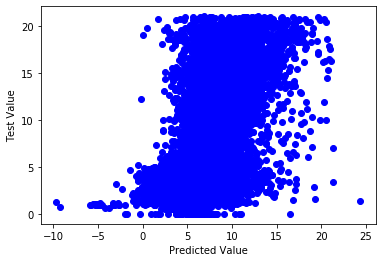

In [141]:
#plot a scatter diagram to predicted value against true value
import matplotlib.pyplot as plt
plt.scatter(lrPredict,y_test,color='b')
plt.xlabel("Predicted Value")
plt.ylabel("Test Value")

In [142]:
#evaluvate accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
meanAbsoluteError=mean_absolute_error(y_test,lrPredict)
meanSqrtError=mean_squared_error(y_test,lrPredict)
rmse=sqrt(meanSqrtError)

print("Mean Absolute Error is : ",meanAbsoluteError)
print("Mean Squared Error is : ",meanSqrtError)
print("Root Mean Squared Error is : ",rmse)

Mean Absolute Error is :  4.3736381226466134
Mean Squared Error is :  27.254043325502554
Root Mean Squared Error is :  5.220540520434886


In [147]:
#export the true value and predicted value as a csv
Table_data.to_csv("C:\\Users\\2018e108\Desktop\\Lab02_2018E108_EC9630\\ResultTable.csv",)